First, we begin by taking in the dataset and cleaning it up for text mining and sentiment analysis. We will also create a new csv file with the clean data.

In [1]:
# Dataset source: https://jmcauley.ucsd.edu/data/amazon/
import pandas as pd
import nltk
import math
import numpy as np
from numpy import dot
from numpy.linalg import norm
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = CountVectorizer()
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EthanS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EthanS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
#Json structure
'''
reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
asin - ID of the product, e.g. 0000013714
reviewerName - name of the reviewer
vote - helpful votes of the review
style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
reviewText - text of the review
overall - rating of the product
summary - summary of the review
unixReviewTime - time of the review (unix time)
reviewTime - time of the review (raw)
image - images that users post after they have received the product
'''

'\nreviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B\nasin - ID of the product, e.g. 0000013714\nreviewerName - name of the reviewer\nvote - helpful votes of the review\nstyle - a disctionary of the product metadata, e.g., "Format" is "Hardcover"\nreviewText - text of the review\noverall - rating of the product\nsummary - summary of the review\nunixReviewTime - time of the review (unix time)\nreviewTime - time of the review (raw)\nimage - images that users post after they have received the product\n'

In [3]:
# Convert reviews to all lowercase
def to_lower(text):
    return text.lower()


# Remove special characters from reviews
def remove_special_char(text):
    newString = ''
    for i in text:
        if i.isalnum():                     # If character is alphanumeric, keep. Else, add a space
            newString = newString + i
        else:
            newString = newString + ' '
    return newString

# Remove stopwords: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    newStr = ""
    for w in words : 
        if w not in stop_words :
            newStr += w + " "
    #return [w for w in words if w not in stop_words]
    return newStr

In [4]:
def getDataFromJson(filename) :
    df = pd.read_json(filename, lines=True)
    df = df.drop(columns=['verified','reviewTime','reviewerID','asin','vote','unixReviewTime','asin','reviewerName'])
    df.reviewText = df.reviewText.apply(to_lower)
    
    df = df[df['reviewText'].str.split().str.len().gt(5)] # Reviews must have greater than 5 words to perform sentiment analysis

    df.reviewText = df.reviewText.apply(remove_special_char)
    
    df.reviewText = df.reviewText.apply(rem_stopwords)
    
    return df

In [5]:
df = getDataFromJson('Movies_and_TV_5.json')

# End of data cleaning, clean data set
df.to_csv("clean_data.csv")
df

,overall,style,reviewText,summary
0,5,{'Format:': ' DVD'},watch learn ended state dying country,Excellent Viewing
3,5,{'Format:': ' DVD'},great read much historical info thank,A great read. So much historical info
5,5,{'Format:': ' VHS Tape'},well done video important information american...,Americans should see this.
6,2,{'Format:': ' VHS Tape'},lot information piece coming faster freight tr...,Lots of Info. But Mostly a Right-Wing Agenda P...
7,5,{'Format:': ' DVD'},essential message told society today people cl...,This should be esential reading for everyone i...
...,...,...,...,...
626,1,NaN,taste strictly porn cheaply produced,One Star
627,1,{'Format:': ' DVD'},nothing even remotely scary werewolf overalls ...,YIKES!!
628,1,{'Format:': ' DVD'},bad 3 short story stupid please waste money ti...,One Star
630,1,{'Format:': ' Prime Video'},wanted show parts film high school english cla...,Do not buy this.


In [6]:
# Use overall to classify as positive or negative: 3+ is positive, 1 and 2 are negative
# reviewText is full review, will use for sentiment analysis
# Summary might be useful for EDA? Length of summary with score maybe?
# Style also for EDA

Now, we will perform EDA to better understand our data and find interesting information about our dataset.

<Axes: >

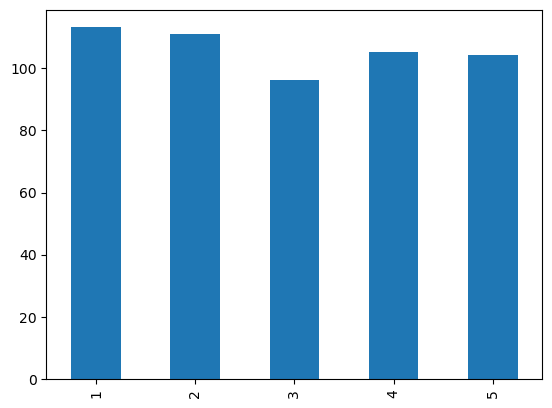

In [7]:
# EDA
pdf = df['overall'].value_counts()
pdf = pdf.reindex(sorted(pdf.index), axis = 1)
pdf.plot.bar()

<Axes: ylabel='style'>

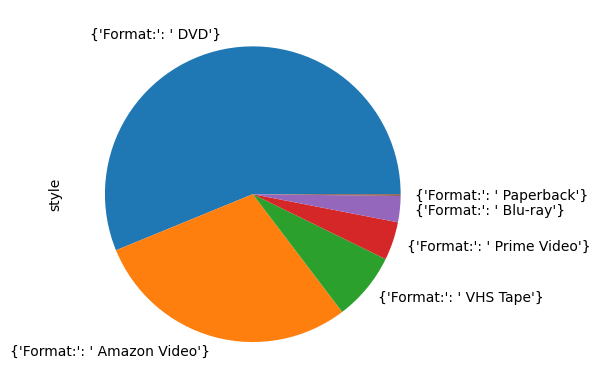

In [8]:
format_df = df['style']
format_df = df['style'].value_counts()
format_df.plot.pie()

<Axes: xlabel='overall'>

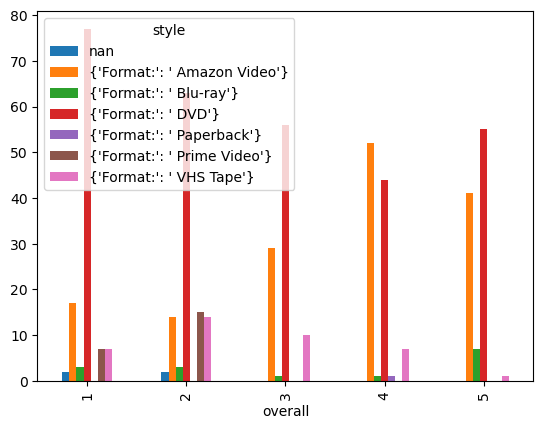

In [9]:
pd.crosstab(df.overall, df['style'].astype(str)).plot.bar()

In [10]:
# END OF EDA

In [11]:
# VECTORIZING BAG OF WORDS
vectorizer.fit(df['reviewText'])
names = vectorizer.get_feature_names_out()
bag_of_words = vectorizer.fit(df['reviewText'])
bag_of_words = vectorizer.transform(df['reviewText'])

In [12]:
print(bag_of_words[0])

  (0, 1361)	1
  (0, 1850)	1
  (0, 1961)	1
  (0, 3296)	1
  (0, 5383)	1
  (0, 6182)	1


In [13]:
# USEFUL FUNCTIONS FOR BAG OF WORDS
bag_of_words[0].indices
bag_of_words[0].data
vectorizer.vocabulary_.get("learn")
names[1361]


'country'

In [14]:
#TFIDF TESTING, PROBABLY NOT USEFUL?
tfidfVect = TfidfVectorizer()
tfidf = tfidfVect.fit(df['reviewText'])
tfidf = tfidfVect.transform(df['reviewText'])
print(tfidf[2])

  (0, 6215)	0.24551129359280968
  (0, 6084)	0.3055654059761589
  (0, 3221)	0.28833106327293073
  (0, 2977)	0.48010892906449415
  (0, 2910)	0.42357593350699946
  (0, 1758)	0.3157736959368348
  (0, 325)	0.5035722421674187


In [15]:
# Cosine similarity function seen in class
def getSimilarity(review1, review2) :
    r1 = review1.todense()
    r2 = review2.todense()
    r1 = np.squeeze(np.asarray(r1))
    r2 = np.squeeze(np.asarray(r2))

    return dot(r1, r2) / (norm(r1) * norm(r2))

In [16]:
getSimilarity(bag_of_words[0],bag_of_words[0])

1.0000000000000002

In [17]:
def classify(index) :
    i = 0
    ratings = []
    #Weighting/amount of positive scores
    posScores = 0
    #Weighting/amount of negative scores
    negScores = 0
    # the mean rating of the k nearest neighbors
    avgRating = 0
    
    # Neighbor class we will use for knn
    class neighbor :
        def __init__(self):
            self.index = -1
            self.distance = -1
        def __eq__(self, other) :
            if(self.distance == other.distance) :
                return True
            else :
                return False
        def __lt__(self, other) :
            if(self.distance < other.distance) :
                return True
            else :
                return False
        def __gt__(self, other) :
            if(self.distance > other.distance) :
                return True
            else :
                return False

    # Get all similarity scores
    neighbors = []
    for review in df['reviewText'] :
        if i == index :
            i += 1
            continue
        sim = getSimilarity(bag_of_words[index], bag_of_words[i])
        #minimum similarity threshold
        if sim > 0.10 :
            # Create neighbor object that we can sort the similarity of and only take the k nearest ones
            curNeighbor = neighbor()
            curNeighbor.index = i
            curNeighbor.distance = sim
            neighbors.append(curNeighbor)

        i += 1
    
    # Get data from knn
    knn = sorted(neighbors)
    k = 201
    
    #iterator for k
    curK = 0
    for neighbor in knn :
        if curK >= k :
            break
        curRating = df.iloc[neighbor.index]['overall']
        #print("Rating: ", curRating)
        ratings.append(curRating)
        # If neighbor has < 3 rating, add negative score weight
        if curRating < 3.0 :
            #weighted knn
            #negScores += pow(sim,1/2) + 0.1
            negScores += 1
        # otherwise add positive score weight
        else :
            #weighted knn
            #posScores += pow(sim,1/2) + 0.1
            posScores += 1
        curK += 1
    
    print("True rating ", df.iloc[index]['overall'])
    print("Pos scores: ", posScores)
    print("Neg scores: ", negScores)
    #print("Scores array : ", ratings)
    avgRating = np.mean(ratings)
    print("Avg rating : ", avgRating)
    # Algorithm for determining classification, given the meanscore and ratio of positive to negative similar reviews
    if avgRating >= 2.5 : 
        if posScores > negScores or abs(posScores - negScores) <= 1 :
            return 1
        else :
            return -1
    else :
        if posScores < negScores or abs(posScores - negScores) <= 1 :
            return -1
        else : 
            return 1 

In [18]:
classify(0)

True rating  5
Pos scores:  17
Neg scores:  5
Avg rating :  3.6818181818181817


1

In [19]:
# Leave one out validator
i = 0
correct = 0
incorrect = 0
for review in df['reviewText'] :
    print("Index ", i)
    trueRating = df.iloc[i]['overall']
    ratingType = 1

    if trueRating < 3.0 :
        ratingType = -1
    predicted = classify(i)
    print("Predicted: ", predicted)
    if ratingType == predicted :
        #print("Correct classification!")
        correct += 1
    else :
        print("Wrong classification")
        incorrect += 1
    i += 1
print("Correct: ", correct, " Incorrect: ", incorrect)
accuracy = correct / (correct + incorrect)
print("Accuracy: ",  accuracy)
        

Index  0
True rating  5
Pos scores:  17
Neg scores:  5
Avg rating :  3.6818181818181817
Predicted:  1
Index  1
True rating  5
Pos scores:  47
Neg scores:  15
Avg rating :  3.8225806451612905
Predicted:  1
Index  2
True rating  5
Pos scores:  20
Neg scores:  7
Avg rating :  3.5185185185185186
Predicted:  1
Index  3
True rating  2
Pos scores:  7
Neg scores:  7
Avg rating :  2.5714285714285716
Predicted:  1
Wrong classification
Index  4
True rating  5
Pos scores:  8
Neg scores:  3
Avg rating :  3.6363636363636362
Predicted:  1
Index  5
True rating  4
Pos scores:  16
Neg scores:  19
Avg rating :  2.742857142857143
Predicted:  -1
Wrong classification
Index  6
True rating  5
Pos scores:  46
Neg scores:  6
Avg rating :  4.25
Predicted:  1
Index  7
True rating  4
Pos scores:  17
Neg scores:  4
Avg rating :  3.8095238095238093
Predicted:  1
Index  8
True rating  5
Pos scores:  10
Neg scores:  9
Avg rating :  2.789473684210526
Predicted:  1
Index  9
True rating  5
Pos scores:  22
Neg scores:  11

True rating  5
Pos scores:  98
Neg scores:  22
Avg rating :  3.8333333333333335
Predicted:  1
Index  81
True rating  4
Pos scores:  108
Neg scores:  7
Avg rating :  4.339130434782609
Predicted:  1
Index  82
True rating  5
Pos scores:  93
Neg scores:  59
Avg rating :  3.2302631578947367
Predicted:  1
Index  83
True rating  5
Pos scores:  134
Neg scores:  67
Avg rating :  3.298507462686567
Predicted:  1
Index  84
True rating  5
Pos scores:  119
Neg scores:  82
Avg rating :  3.0049751243781095
Predicted:  1
Index  85
True rating  5
Pos scores:  20
Neg scores:  28
Avg rating :  2.3541666666666665
Predicted:  -1
Wrong classification
Index  86
True rating  3
Pos scores:  43
Neg scores:  11
Avg rating :  3.5
Predicted:  1
Index  87
True rating  1
Pos scores:  60
Neg scores:  49
Avg rating :  2.8990825688073394
Predicted:  1
Wrong classification
Index  88
True rating  5
Pos scores:  149
Neg scores:  38
Avg rating :  3.716577540106952
Predicted:  1
Index  89
True rating  5
Pos scores:  53
Neg s

True rating  4
Pos scores:  53
Neg scores:  4
Avg rating :  4.12280701754386
Predicted:  1
Index  159
True rating  4
Pos scores:  49
Neg scores:  26
Avg rating :  3.16
Predicted:  1
Index  160
True rating  5
Pos scores:  138
Neg scores:  22
Avg rating :  3.98125
Predicted:  1
Index  161
True rating  5
Pos scores:  121
Neg scores:  9
Avg rating :  4.230769230769231
Predicted:  1
Index  162
True rating  4
Pos scores:  144
Neg scores:  52
Avg rating :  3.5510204081632653
Predicted:  1
Index  163
True rating  4
Pos scores:  79
Neg scores:  12
Avg rating :  4.087912087912088
Predicted:  1
Index  164
True rating  5
Pos scores:  119
Neg scores:  82
Avg rating :  3.044776119402985
Predicted:  1
Index  165
True rating  5
Pos scores:  8
Neg scores:  2
Avg rating :  4.0
Predicted:  1
Index  166
True rating  3
Pos scores:  101
Neg scores:  39
Avg rating :  3.4857142857142858
Predicted:  1
Index  167
True rating  3
Pos scores:  91
Neg scores:  12
Avg rating :  4.038834951456311
Predicted:  1
Index 

True rating  1
Pos scores:  7
Neg scores:  13
Avg rating :  2.05
Predicted:  -1
Index  238
True rating  2
Pos scores:  42
Neg scores:  12
Avg rating :  3.5
Predicted:  1
Wrong classification
Index  239
True rating  4
Pos scores:  42
Neg scores:  33
Avg rating :  2.7466666666666666
Predicted:  1
Index  240
True rating  4
Pos scores:  56
Neg scores:  23
Avg rating :  3.4683544303797467
Predicted:  1
Index  241
True rating  4
Pos scores:  128
Neg scores:  24
Avg rating :  3.8815789473684212
Predicted:  1
Index  242
True rating  4
Pos scores:  125
Neg scores:  63
Avg rating :  3.24468085106383
Predicted:  1
Index  243
True rating  4
Pos scores:  56
Neg scores:  39
Avg rating :  2.957894736842105
Predicted:  1
Index  244
True rating  3
Pos scores:  93
Neg scores:  42
Avg rating :  3.2814814814814817
Predicted:  1
Index  245
True rating  3
Pos scores:  14
Neg scores:  2
Avg rating :  3.4375
Predicted:  1
Index  246
True rating  4
Pos scores:  45
Neg scores:  23
Avg rating :  3.26470588235294

True rating  3
Pos scores:  108
Neg scores:  90
Avg rating :  2.8585858585858586
Predicted:  1
Index  314
True rating  3
Pos scores:  92
Neg scores:  77
Avg rating :  2.8165680473372783
Predicted:  1
Index  315
True rating  2
Pos scores:  38
Neg scores:  38
Avg rating :  2.6578947368421053
Predicted:  1
Wrong classification
Index  316
True rating  3
Pos scores:  22
Neg scores:  22
Avg rating :  2.590909090909091
Predicted:  1
Index  317
True rating  3
Pos scores:  14
Neg scores:  9
Avg rating :  2.5652173913043477
Predicted:  1
Index  318
True rating  3
Pos scores:  7
Neg scores:  0
Avg rating :  4.0
Predicted:  1
Index  319
True rating  1
Pos scores:  8
Neg scores:  2
Avg rating :  3.4
Predicted:  1
Wrong classification
Index  320
True rating  1
Pos scores:  15
Neg scores:  12
Avg rating :  2.5185185185185186
Predicted:  1
Wrong classification
Index  321
True rating  1
Pos scores:  3
Neg scores:  3
Avg rating :  2.5
Predicted:  1
Wrong classification
Index  322
True rating  3
Pos scor

True rating  1
Pos scores:  67
Neg scores:  92
Avg rating :  2.3836477987421385
Predicted:  -1
Index  389
True rating  1
Pos scores:  20
Neg scores:  45
Avg rating :  2.123076923076923
Predicted:  -1
Index  390
True rating  2
Pos scores:  44
Neg scores:  39
Avg rating :  2.7951807228915664
Predicted:  1
Wrong classification
Index  391
True rating  1
Pos scores:  14
Neg scores:  15
Avg rating :  2.4482758620689653
Predicted:  -1
Index  392
True rating  1
Pos scores:  75
Neg scores:  102
Avg rating :  2.5028248587570623
Predicted:  -1
Index  393
True rating  1
Pos scores:  110
Neg scores:  91
Avg rating :  2.870646766169154
Predicted:  1
Wrong classification
Index  394
True rating  2
Pos scores:  60
Neg scores:  80
Avg rating :  2.3714285714285714
Predicted:  -1
Index  395
True rating  1
Pos scores:  75
Neg scores:  88
Avg rating :  2.6012269938650308
Predicted:  -1
Index  396
True rating  1
Pos scores:  99
Neg scores:  85
Avg rating :  2.8532608695652173
Predicted:  1
Wrong classificati

True rating  1
Pos scores:  1
Neg scores:  3
Avg rating :  2.0
Predicted:  -1
Index  463
True rating  2
Pos scores:  106
Neg scores:  95
Avg rating :  2.746268656716418
Predicted:  1
Wrong classification
Index  464
True rating  2
Pos scores:  22
Neg scores:  44
Avg rating :  2.121212121212121
Predicted:  -1
Index  465
True rating  2
Pos scores:  5
Neg scores:  5
Avg rating :  2.5
Predicted:  1
Wrong classification
Index  466
True rating  1
Pos scores:  0
Neg scores:  0
Avg rating :  nan
Predicted:  -1
Index  467
True rating  2
Pos scores:  15
Neg scores:  29
Avg rating :  2.3636363636363638
Predicted:  -1
Index  468


C:\Users\EthanS\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\EthanS\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


True rating  1
Pos scores:  29
Neg scores:  32
Avg rating :  2.557377049180328
Predicted:  -1
Index  469
True rating  2
Pos scores:  30
Neg scores:  46
Avg rating :  2.4210526315789473
Predicted:  -1
Index  470
True rating  2
Pos scores:  47
Neg scores:  62
Avg rating :  2.596330275229358
Predicted:  -1
Index  471
True rating  2
Pos scores:  72
Neg scores:  70
Avg rating :  2.732394366197183
Predicted:  1
Wrong classification
Index  472
True rating  2
Pos scores:  4
Neg scores:  7
Avg rating :  2.6363636363636362
Predicted:  -1
Index  473
True rating  2
Pos scores:  6
Neg scores:  5
Avg rating :  2.909090909090909
Predicted:  1
Wrong classification
Index  474
True rating  2
Pos scores:  24
Neg scores:  31
Avg rating :  2.5272727272727273
Predicted:  -1
Index  475
True rating  2
Pos scores:  108
Neg scores:  93
Avg rating :  2.7860696517412937
Predicted:  1
Wrong classification
Index  476
True rating  2
Pos scores:  18
Neg scores:  20
Avg rating :  2.5526315789473686
Predicted:  -1
Inde